In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import S3processing as s

In [3]:
prefix = 'C:\\Users\\Administrator\\Documents\\Sentinel3\\S3A_OL_1_EFR____20170728T100524_20170728T100824_20170729T140754_0180_020_236_2159_LN1_O_NT_002.SEN3\\'

OLCIprocessing(ProductName, OutputName=True):
- ProductName denotes the path to the Sentinel 3 product of interest
- OutputName will be the name of the later on generated png file. If set to True, this function will set this variable to S3A_ followed by the date and time of the products retrieval. Default is True.

In [4]:
S3prod = s.OLCIprocessing(prefix)

ImportIMG:

This function can be used to import the png file out of the product directory. Arrays will be unmasked.

In [ ]:
#S3prod.ImportIMG()

ImportNetCDF(NumBand):
- NumBand denotes how many bands actually are read in. For the RGB natural color images, only the first 10 bands are used (see SNAP toolbox). If not specified, all 21 bands will be imported.

In [5]:
S3prod.importNetCDF(NumBand=10)

Importing 10 bands took 3.633029 seconds.


CalcRGB(method='bands357'):
used for converting spectral bands into natural color values in RGB form for the plotting funtion.
- method='bands357'; the bands 3, 5, and 7 are used for the RGB data.
- method='log'; merges the bands 1 - 10 according to the method used by the SNAP toolbox into the RGB data

In [6]:
S3prod.calcRGB(method='bands357')

Scaling:
- scale denotes the factor with which the data arrays will be scaled, i.e. only every n^th data point will be used, where n = scale. Default is n = 8.

In [7]:
S3prod.scaling(scale=8)

createDynamp():
- this function uses several underlying functions to create a dynamic image of the product. Currently, the only use is to cut off values of the upper/lower end of the data interval.

:DynamicMap   [lower,upper]
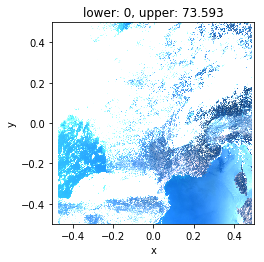

In [8]:
dmap = S3prod.createDynmap()
dmap

transformCoords(proj='laea'):
- if the image is too far north/south for the Mercator projection to visualize it properly, the Lambert Azimuthal Equal-Area projection ('laea') can be used. This projection is currently the only alternative to the Mercator and thus set to default if transformCoords is used.

In [ ]:
#S3prod.transformCoords()

createBasemap():
- builds the frame for the later plot. If no other projection has been chosen, Mercator will be used. This function needs the lot/lan to work, nothing else

In [9]:
S3prod.createBasemap()

savePNG(array=None, TargetDir='./'):
- array denotes the data that will be used. If nothing is specified, savePNG uses the unprocessed RGB data from the calcRGB function. To use the output from createDynmap, use array=dmap.last.data
- newDir denotes the name of the directory where the png file will be stored. Default is the current directory.

In [10]:
S3prod.savePNG(array=dmap.last.data)

MercatorPlot():
- works only for Mercator projection. Plots the .png file as an image overlay on the leaflet map.

In [14]:
#S3prod.mapPlot(array=dmap.last.data)

In [12]:
S3prod.MercatorPlot()

A Jupyter Widget